In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [ ]:
dataset = pd.read_csv("/content/handwritten_data_785.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [ ]:
print("shape:",X.shape)
print("columns count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372037, 784)
columns count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


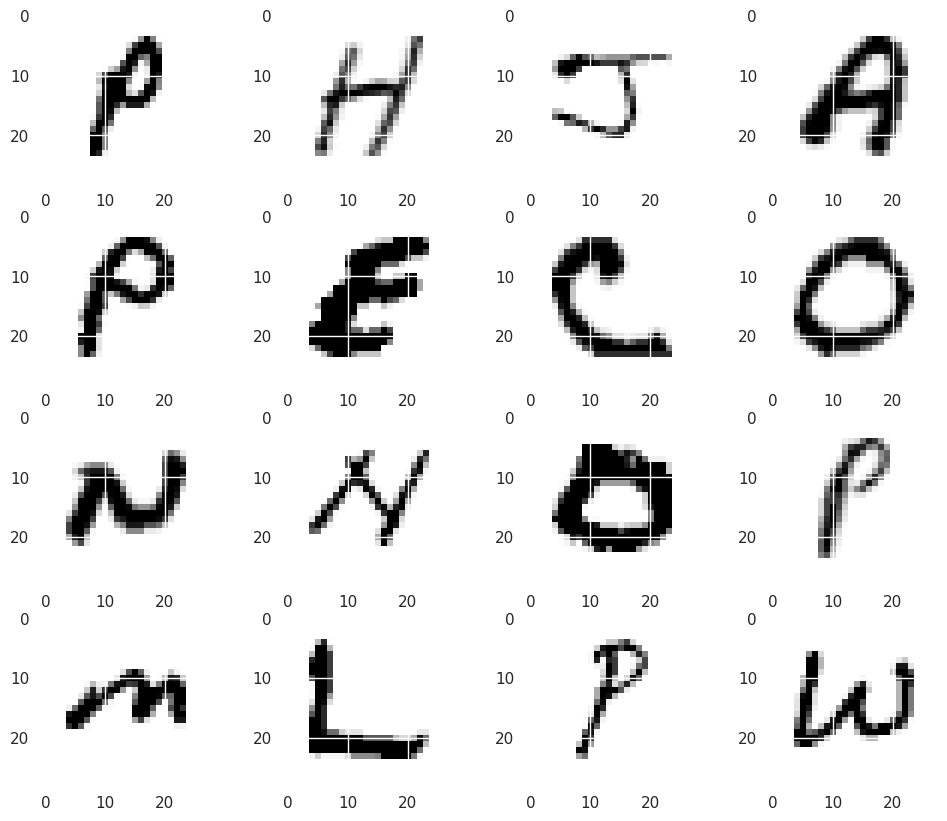

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


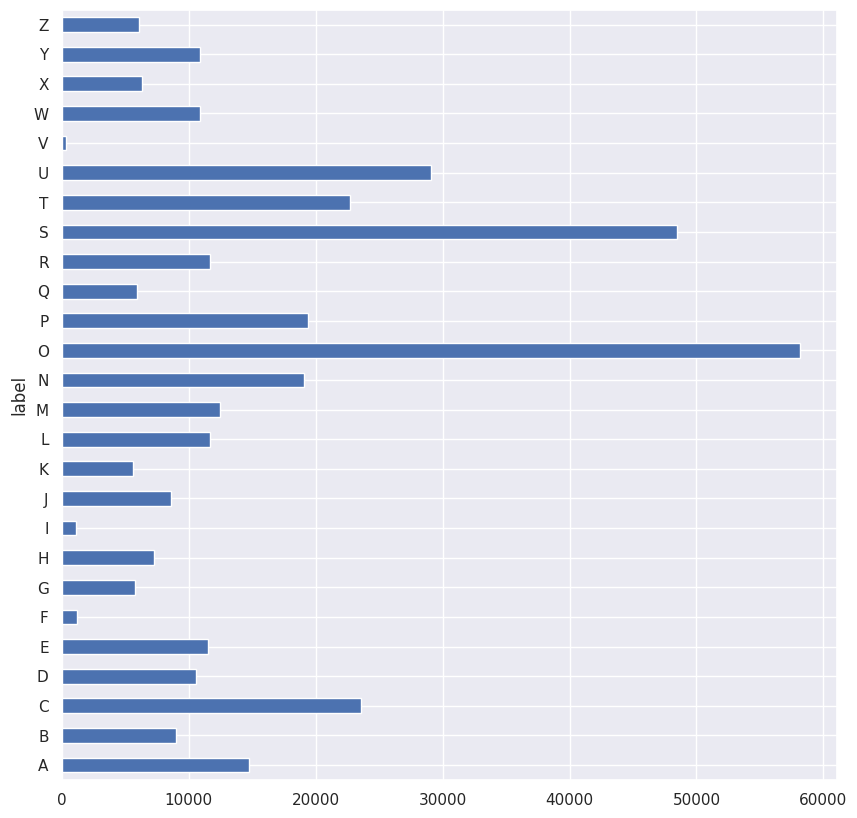

We have very low observations for I and F 
I count: 1118
F count: 1164


In [ ]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [ ]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


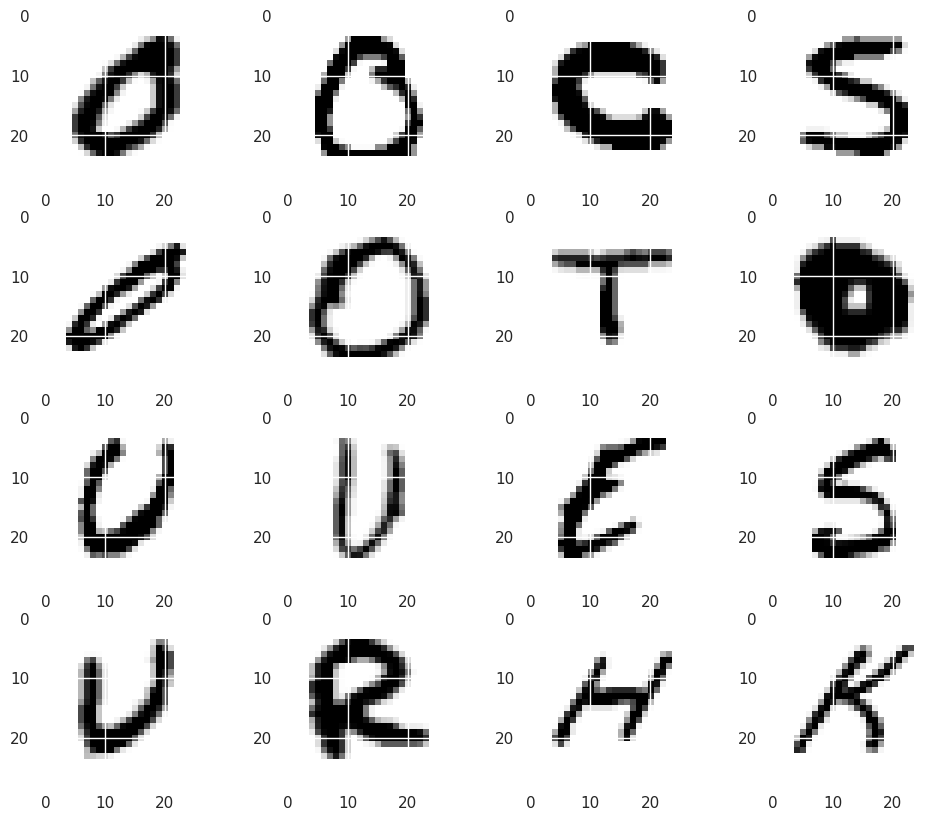

In [ ]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1396/1396 - 14s - 10ms/step - accuracy: 0.9291 - loss: 0.2613 - val_accuracy: 0.9702 - val_loss: 0.1111
Epoch 2/18
1396/1396 - 5s - 3ms/step - accuracy: 0.9715 - loss: 0.1071 - val_accuracy: 0.9765 - val_loss: 0.0871
Epoch 3/18
1396/1396 - 6s - 4ms/step - accuracy: 0.9775 - loss: 0.0838 - val_accuracy: 0.9804 - val_loss: 0.0739
Epoch 4/18
1396/1396 - 4s - 3ms/step - accuracy: 0.9806 - loss: 0.0707 - val_accuracy: 0.9821 - val_loss: 0.0674
Epoch 5/18
1396/1396 - 5s - 3ms/step - accuracy: 0.9834 - loss: 0.0599 - val_accuracy: 0.9839 - val_loss: 0.0625
Epoch 6/18
1396/1396 - 5s - 4ms/step - accuracy: 0.9851 - loss: 0.0523 - val_accuracy: 0.9854 - val_loss: 0.0562
Epoch 7/18
1396/1396 - 4s - 3ms/step - accuracy: 0.9867 - loss: 0.0460 - val_accuracy: 0.9866 - val_loss: 0.0517
Epoch 8/18
1396/1396 - 5s - 4ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9875 - val_loss: 0.0494
Epoch 9/18
1396/1396 - 5s - 4ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9873 

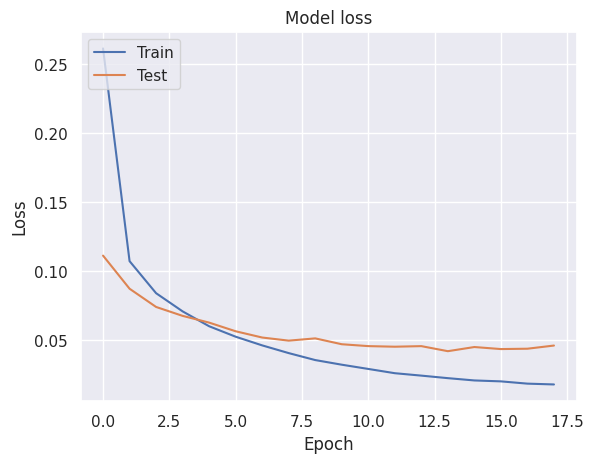

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


2907/2907 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


<Axes: >

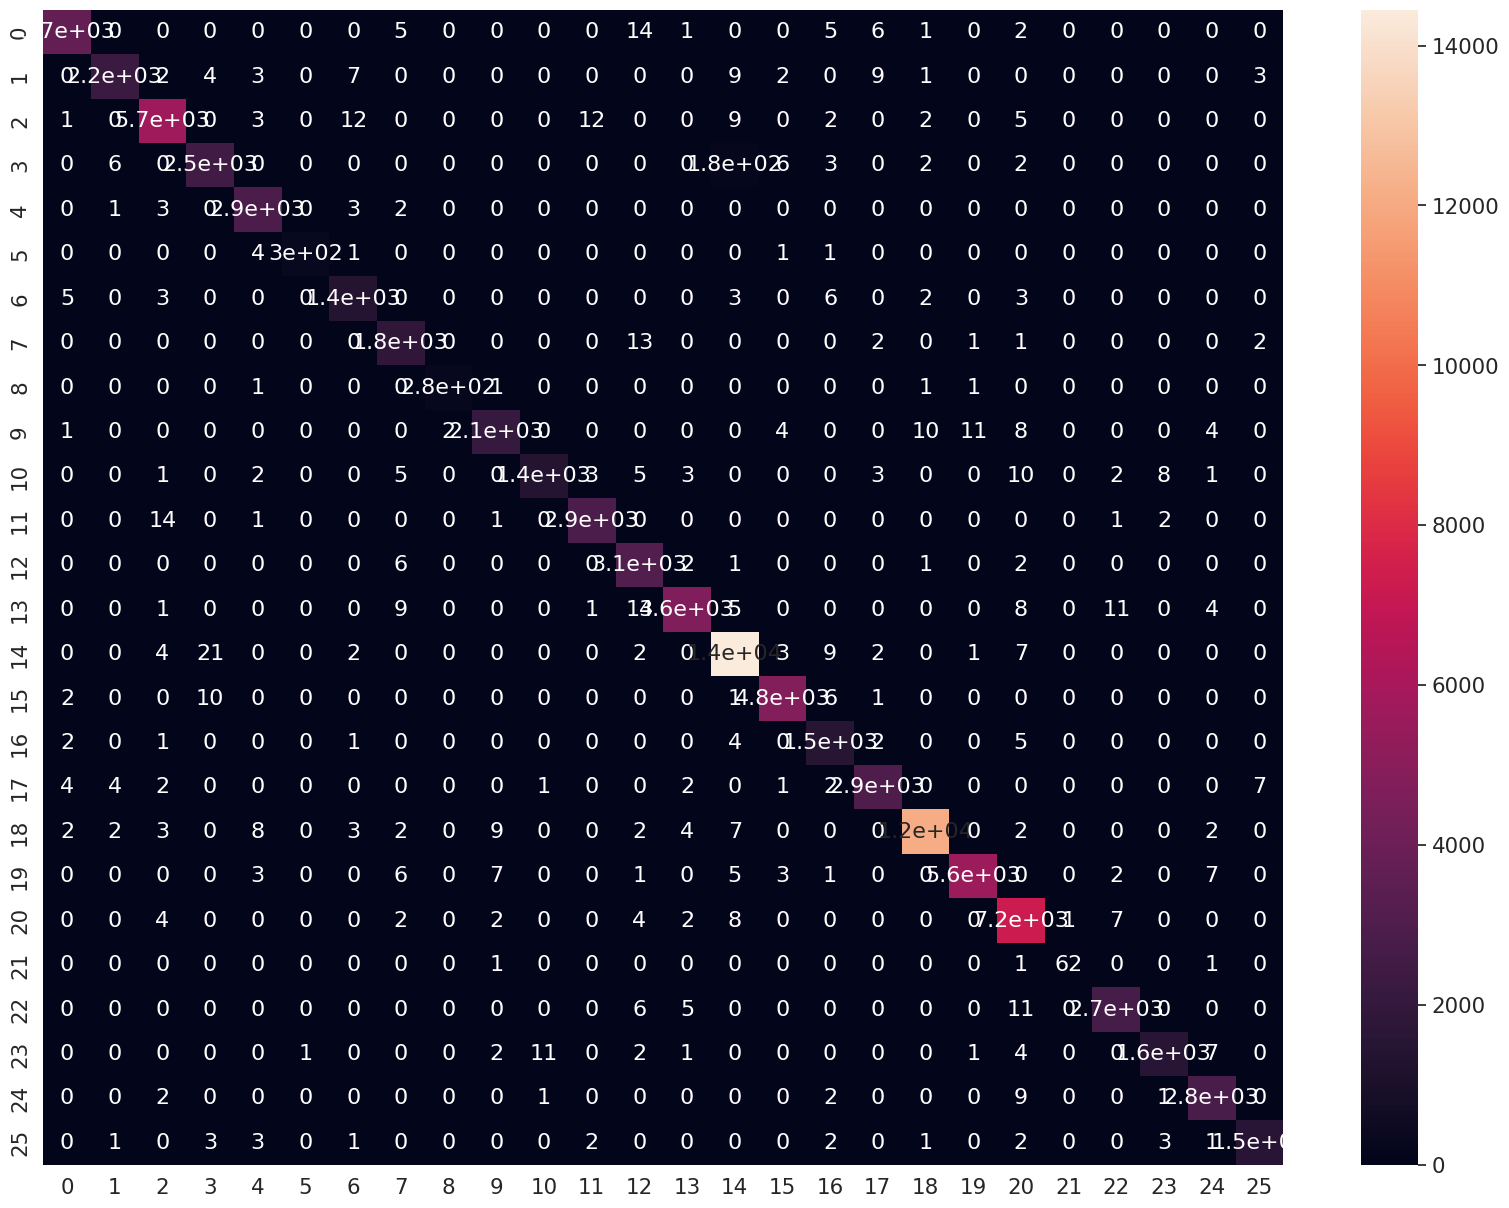

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Random Test Images: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


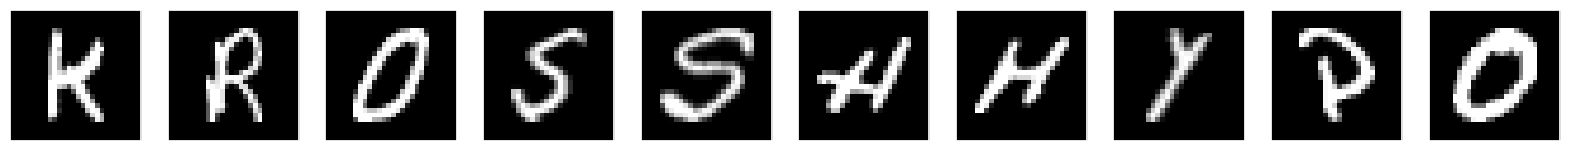

Predicted classes: K R O S S H H Y P O 

In [ ]:
# Random testing

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

import matplotlib.pyplot as plt
%matplotlib inline

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

print('Random Test Images: ')
prediction = cls.predict(X_test[10:20])
show_imgs(X_test[10:20])
classes_x=np.argmax(prediction,axis=1)
print('Predicted classes: ',end="")
for p in classes_x:
    print(output_labels[p],end=" ")